##Librerias

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Datos

In [4]:
df_bikes = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', 
                 sep = ';',
                 error_bad_lines=False
                 )
df_bikes.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Punto 1

Verifcación de validación de datos y limpieza 

## 1.1 Dimensión del conjunto de datos

In [5]:
print('Renta de bicicletas en Seúl')
print('Filas: ', df_bikes.shape[0])
print('Columnas: ', df_bikes.shape[1])

Renta de bicicletas en Seúl
Filas:  8760
Columnas:  13


## 1.2 Tipo de datos

In [6]:
df_bikes.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(?C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(?C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

## 1.3 Datos faltantes 

In [7]:
df_bikes.isnull()

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False


* Número de valores faltantes por variable

In [8]:

df_bikes.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(?C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(?C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No existen valores faltantes

## 1.4 Datos duplicados

In [9]:
df_bikes[df_bikes.duplicated()]

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


No existen datos duplicados

## 1.5 Consistencia del conjunto de datos 

In [10]:
df_bikes.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(?C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(?C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### Consistencia en datos cuantitativos

In [11]:
print(df_bikes['Rented Bike Count'].value_counts())

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64


In [12]:
print(df_bikes['Hour'].value_counts())

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64


In [13]:
print(df_bikes['Temperature(?C)'].value_counts())

 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(?C), Length: 546, dtype: int64


In [14]:
print(df_bikes['Humidity(%)'].value_counts())

53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 90, dtype: int64


In [15]:
print(df_bikes['Wind speed (m/s)'].value_counts())

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64


In [16]:
print(df_bikes['Visibility (10m)'].value_counts())

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility (10m), Length: 1789, dtype: int64


In [17]:
print(df_bikes['Dew point temperature(?C)'].value_counts())

 0.0     60
 21.1    43
 14.3    40
 21.2    40
 8.9     39
         ..
-28.3     1
-29.8     1
-23.8     1
-29.1     1
 25.7     1
Name: Dew point temperature(?C), Length: 556, dtype: int64


In [18]:
print(df_bikes['Solar Radiation (MJ/m2)'].value_counts())

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64


In [19]:
print(df_bikes['Rainfall(mm)'].value_counts())

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64


In [20]:
print(df_bikes['Snowfall (cm)'].value_counts())

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64


### Consistencia en datos cualitativos

In [21]:
print(df_bikes['Seasons'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


In [22]:
print(df_bikes['Holiday'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


In [23]:
print(df_bikes['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


## Estandarización de datos 

In [24]:
df_bikes1 = df_bikes

In [25]:
from sklearn import preprocessing

x = df_bikes1[["Rented Bike Count","Hour","Temperature(?C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)" ,"Dew point temperature(?C)","Solar Radiation (MJ/m2)","Rainfall(mm)", 
"Snowfall (cm)"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_bikes2= pd.DataFrame(x_scaled, columns= ["Rented Bike Count","Hour","Temperature(?C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)" ,"Dew point temperature(?C)","Solar Radiation (MJ/m2)","Rainfall(mm)", 
"Snowfall (cm)"])

In [26]:
df_bikes2

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0.071429,0.000000,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0
1,0.057368,0.043478,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0
2,0.048650,0.086957,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0
3,0.030090,0.130435,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0
4,0.021935,0.173913,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,0.282058,0.826087,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0
8756,0.214848,0.869565,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0
8757,0.195163,0.913043,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0
8758,0.200225,0.956522,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0


# Punto 2

## 2.1 Selección de la variable a predecir/clasificar

In [27]:
df_bikes['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

La variable a predecir es la renta de las bicicletas

## 2.2 Selección de las variables independientes. Justifique por qué la selección de dichas variables.

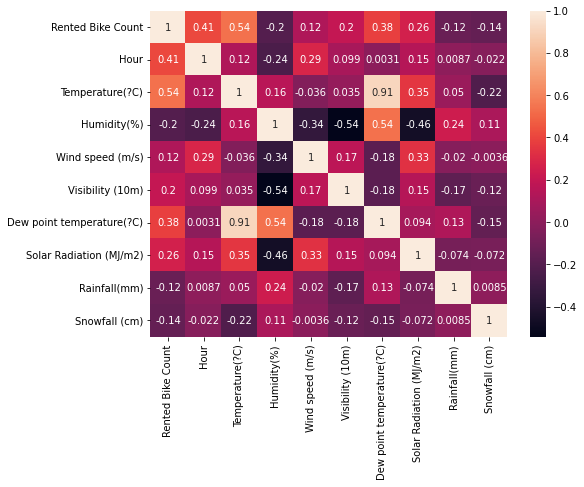

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = df_bikes[["Rented Bike Count","Hour","Temperature(?C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)" ,"Dew point temperature(?C)","Solar Radiation (MJ/m2)","Rainfall(mm)", 
"Snowfall (cm)"]].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

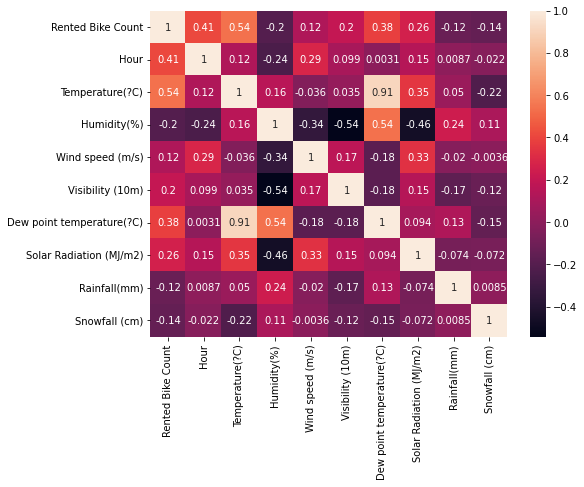

In [29]:
corr_df = df_bikes2[["Rented Bike Count","Hour","Temperature(?C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)" ,"Dew point temperature(?C)","Solar Radiation (MJ/m2)","Rainfall(mm)", 
"Snowfall (cm)"]].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Como se evidencia en el gráfico de correlación las variables que mayor correlación poseen con la variable respuesta, son la temperatura, la velocidad del viento, la visibilidad, la lluvia, la nevada, la humedad y la radiación solar en cuanto a las variables cualitativas escogimos la estación ya que cada una posee particulares caracteristicas en el ambiente, si es día festivo o no y si es dia funcional, por las gráficas de la entrega pasada. 

## 2.3 Seleccione un algoritmo

Seleccionamos la regresion Lasso

In [30]:
df_bike=df_bikes.copy()

In [31]:
Seasons = pd.get_dummies(df_bikes['Seasons'],prefix = 'Seasons')
hol= pd.get_dummies(df_bikes['Holiday'],prefix = 'Holiday')
fd = pd.get_dummies(df_bikes['Functioning Day'],prefix = 'Functioning Day')


In [32]:
df_bike2=df_bike[["Rented Bike Count","Temperature(?C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)" ,"Solar Radiation (MJ/m2)","Rainfall(mm)", 
"Snowfall (cm)"]]

In [33]:
db=pd.concat([df_bike2,Seasons,hol,fd],axis=1)

In [34]:
db

,Rented Bike Count,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,764,3.4,37,2.3,2000,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,694,2.6,39,0.3,1968,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,712,2.1,41,1.0,1859,0.0,0.0,0.0,1,0,0,0,0,1,0,1


In [35]:
db2=db.drop(['Seasons_Autumn','Holiday_Holiday','Functioning Day_No'],axis=1)
db2

,Rented Bike Count,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,0,1,1
8756,764,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,0,1,1
8757,694,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,0,1,1
8758,712,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,0,1,1


In [37]:
from sklearn.linear_model import Lasso
lassoreg = Lasso()
feature_cols = ['Temperature(?C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons_Spring','Seasons_Summer','Seasons_Winter','Holiday_No Holiday','Functioning Day_Yes']
X = db2[feature_cols]
y = db2['Rented Bike Count']
lassoreg.fit(X, y)
y_pred = lassoreg.predict(X)
db2.head()

,Rented Bike Count,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,col_pred
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1,324.175403
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1,217.051762
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1,201.478862
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1,177.703358
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1,313.805533


In [38]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(db2['Rented Bike Count'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(db2['Rented Bike Count'], y_pred)))

MAE: 342.0911700811353
RMSE: 466.0801933195041


## 2.4 Aplique el algoritmo realizando un modelo utilizando todo el dataset preprocesado, prediga todos los valores del conjunto y evalúe con las métricas correspondientes al tipo de aprendizaje supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo.

In [46]:
feature_cols = ['Temperature(?C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons_Spring','Seasons_Summer','Seasons_Winter','Holiday_No Holiday','Functioning Day_Yes']
X = db2[feature_cols]
y = db2['Rented Bike Count']

al=[10,1,0.1]
to=[0.1,0.001,0.0001]
for i in al:
  for j in to:
    lassoreg = Lasso(alpha=i,tol=j)
    lassoreg.fit(X, y)
    y_pred = lassoreg.predict(X)
    print(f'alpha: {i}, tolerancia: {j}')
    print('MAE:', metrics.mean_absolute_error(db2['Rented Bike Count'], y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(db2['Rented Bike Count'], y_pred)))
    print('----------------------------------------------'*10)

 

alpha: 10, tolerancia: 0.1
MAE: 350.5683058714743
RMSE: 476.83335098169016
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
alpha: 10, tolerancia: 0.001
MAE: 350.5722934709322
RMSE: 476.8392770822389
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.5  Aplique el algoritmo realizando un modelo utilizando una partición el dataset preprocesado (elija entre alguno de los tipos de validación cruzada vistas en clase), prediga los valores utilizando el conjunto de validación y evalúe con las métricas correspondientes al tipo de aprendizaje supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo.


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7884, 12) (876, 12) (7884,) (876,)


In [59]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


al=[10,1,0.1]
to=[0.1,0.001,0.0001]
sp=[5,10]
for k in sp:
  for i in al:
    for j in to:
      lassoreg = Lasso(alpha=i,tol=j)
      lassoreg.fit(X_train, y_train)
      cv = KFold(n_splits=k, random_state=666, shuffle=True)
      scores1 = cross_val_score(lassoreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
      scores2 = cross_val_score(lassoreg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
      print(f'alpha: {i}, tolerancia: {j},splits:{k}')
      print('MAE K-fold:',abs(np.mean(scores1)))
      print('RMSE K-fold:',np.sqrt(abs(np.mean(scores2))))
      y_pred=lassoreg.predict(X_test)
      print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
      print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
      print('----------------------------------------------'*10)



alpha: 10, tolerancia: 0.1,splits:5
MAE K-fold: 349.4595714502214
RMSE K-fold: 474.91973772998017
MAE: 361.77694653274466
RMSE: 497.19611733763895
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
alpha: 10, tolerancia: 0.001,splits:5
MAE K-fold: 349.45467650738414
RMSE K-fold: 474.92122853212646
MAE: 361.7465089266531
RMSE: 497.1753481651789
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [63]:
lassoreg = Lasso(alpha=1,tol=0.0001)
lassoreg.fit(X_train, y_train)
cv = KFold(n_splits=5, random_state=666, shuffle=True)
scores1 = cross_val_score(lassoreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(lassoreg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(f'alpha: {i}, tolerancia: {j},splits:{k}')
print('MAE K-fold:',abs(np.mean(scores1)))
print('RMSE K-fold:',np.sqrt(abs(np.mean(scores2))))
y_pred=lassoreg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

alpha: 0.1, tolerancia: 0.0001,splits:10
MAE K-fold: 341.0001464525153
RMSE K-fold: 464.3555547974544
MAE: 355.7362487866674
RMSE: 487.1689518809043


La combinación que trae mejores metricas es la de alpha 1, tolerancia 0.001 y 5 splits

In [62]:
lassoreg = Lasso(alpha=1,tol=0.0001)
lassoreg.fit(X, y)
y_pred = lassoreg.predict(X)
print('MAE:', metrics.mean_absolute_error(db2['Rented Bike Count'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(db2['Rented Bike Count'], y_pred)))


MAE: 342.0911700811353
RMSE: 466.0801933195041


Para el modelo sin particionar esta es la mejor